# What is classification

Classification is a supervised learning concept which basically categorizes a set of data into classes.
The most common classification problems are – speech recognition, face detection, handwriting recognition, document classification, etc. It can be either a binary classification problem or a multi-class problem too.

# Classification Algorithms

* Logistic Regression
* Naive Bayes
* Stochastic Gradient Descent
* K-Nearest Neighbors
* Decision Tree
* Random Forest
* Artificial Neural Network
* Support Vector Machine
* XGBoost
* Light GBM
* CatBoost 

### Applications of Classification Algorithms

* Email spam classification
* Bank customers loan pay willingness prediction.
* Cancer tumor cell identification.
* Sentiment analysis
* Drugs classification
* Facial keypoints detection
* Pedestrian detection in automotive car driving.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# EDA

In [2]:
#personal informations applications

application = pd.read_csv("data/application_record.csv")
application.columns = map(str.lower, application.columns)
application.head()

,id,code_gender,flag_own_car,flag_own_realty,cnt_children,amt_income_total,name_income_type,name_education_type,name_family_status,name_housing_type,days_birth,days_employed,flag_mobil,flag_work_phone,flag_phone,flag_email,occupation_type,cnt_fam_members
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


In [3]:
application.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   438557 non-null  int64  
 1   code_gender          438557 non-null  object 
 2   flag_own_car         438557 non-null  object 
 3   flag_own_realty      438557 non-null  object 
 4   cnt_children         438557 non-null  int64  
 5   amt_income_total     438557 non-null  float64
 6   name_income_type     438557 non-null  object 
 7   name_education_type  438557 non-null  object 
 8   name_family_status   438557 non-null  object 
 9   name_housing_type    438557 non-null  object 
 10  days_birth           438557 non-null  int64  
 11  days_employed        438557 non-null  int64  
 12  flag_mobil           438557 non-null  int64  
 13  flag_work_phone      438557 non-null  int64  
 14  flag_phone           438557 non-null  int64  
 15  flag_email       

In [4]:
#transactional Info
credit = pd.read_csv("data/credit_record.csv")
credit.columns = map(str.lower, credit.columns)
credit.head()

,id,months_balance,status
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C


In [5]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   id              1048575 non-null  int64 
 1   months_balance  1048575 non-null  int64 
 2   status          1048575 non-null  object
dtypes: int64(2), object(1)
memory usage: 24.0+ MB


In [6]:
# Convert Status column to numeric
credit.status = credit.status.replace({'X':-2, 'C':-1})
credit.status = credit.status.astype('int')
credit.status = credit.status.apply(lambda x:x+1)

In [7]:
credit_month = credit.groupby('id').months_balance.max().reset_index()
credit_month.head()

,id,months_balance
0,5001711,0
1,5001712,0
2,5001713,0
3,5001714,0
4,5001715,0


In [8]:
record = pd.merge(credit_month, credit, how="inner", on=["id", "months_balance"])
record.head()

,id,months_balance,status
0,5001711,0,-1
1,5001712,0,0
2,5001713,0,-1
3,5001714,0,-1
4,5001715,0,-1


In [9]:
#Merge the record df with application df

df = pd.merge(application, record, on="id", how="inner")
df.head()

,id,code_gender,flag_own_car,flag_own_realty,cnt_children,amt_income_total,name_income_type,name_education_type,name_family_status,name_housing_type,days_birth,days_employed,flag_mobil,flag_work_phone,flag_phone,flag_email,occupation_type,cnt_fam_members,months_balance,status
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,0,0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,0,0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0,0,0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,0,1
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,-22,-1


In [10]:
#Rename columns
df = df.rename(columns={'code_gender':'gender',
                   'flag_own_car':'car',
                   'flag_own_realty':'property',
                   'cnt_children':'children',
                   'amt_income_total':'annual_income',
                   'name_income_type':'income_type',
                   'name_education_type':'education',
                   'name_family_status':'family_status',
                   'name_housing_type':'housing_type',
                   'days_birth':'birth_date',
                   'days_employed':'employment',
                   'flag_mobil':'mobile_phone',
                   'flag_work_phone':'work_phone',
                   'flag_phone':'phone',
                   'flag_email': 'email',
                   'cnt_fam_members':'fam_members'
                   })
df.head()

,id,gender,car,property,children,annual_income,income_type,education,family_status,housing_type,birth_date,employment,mobile_phone,work_phone,phone,email,occupation_type,fam_members,months_balance,status
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,0,0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,0,0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0,0,0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,0,1
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,-22,-1


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36457 entries, 0 to 36456
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               36457 non-null  int64  
 1   gender           36457 non-null  object 
 2   car              36457 non-null  object 
 3   property         36457 non-null  object 
 4   children         36457 non-null  int64  
 5   annual_income    36457 non-null  float64
 6   income_type      36457 non-null  object 
 7   education        36457 non-null  object 
 8   family_status    36457 non-null  object 
 9   housing_type     36457 non-null  object 
 10  birth_date       36457 non-null  int64  
 11  employment       36457 non-null  int64  
 12  mobile_phone     36457 non-null  int64  
 13  work_phone       36457 non-null  int64  
 14  phone            36457 non-null  int64  
 15  email            36457 non-null  int64  
 16  occupation_type  25134 non-null  object 
 17  fam_members 

In [12]:
df.isna().sum()

id                     0
gender                 0
car                    0
property               0
children               0
annual_income          0
income_type            0
education              0
family_status          0
housing_type           0
birth_date             0
employment             0
mobile_phone           0
work_phone             0
phone                  0
email                  0
occupation_type    11323
fam_members            0
months_balance         0
status                 0
dtype: int64

In [13]:
#Fill null values
df.occupation_type = df.occupation_type.fillna("Others")

In [14]:
#Transform birth_date and employment to positive numbers
df['age'] = df.birth_date.apply(lambda x: round(x/-365,0))
df['year_of_employment'] = df.employment.apply(lambda x: round(x/-365,0) if x<0 else 0)

df = df.drop(columns=["birth_date","employment"])

In [15]:
df.describe()

,id,children,annual_income,mobile_phone,work_phone,phone,email,fam_members,months_balance,status,age,year_of_employment
count,3.645700e+04,36457.000000,3.645700e+04,36457.0,36457.000000,36457.000000,36457.000000,36457.000000,36457.000000,36457.000000,36457.000000,36457.00000
mean,5.078227e+06,0.430315,1.866857e+05,1.0,0.225526,0.294813,0.089722,2.198453,-5.831802,-0.002716,43.777382,6.03810
std,4.187524e+04,0.742367,1.017892e+05,0.0,0.417934,0.455965,0.285787,0.911686,11.326494,0.783104,11.519211,6.48948
min,5.008804e+06,0.000000,2.700000e+04,1.0,0.000000,0.000000,0.000000,1.000000,-60.000000,-1.000000,21.000000,0.00000
25%,5.042028e+06,0.000000,1.215000e+05,1.0,0.000000,0.000000,0.000000,2.000000,-6.000000,-1.000000,34.000000,1.00000
50%,5.074614e+06,0.000000,1.575000e+05,1.0,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,43.000000,4.00000
75%,5.115396e+06,1.000000,2.250000e+05,1.0,0.000000,1.000000,0.000000,3.000000,0.000000,0.000000,53.000000,9.00000
max,5.150487e+06,19.000000,1.575000e+06,1.0,1.000000,1.000000,1.000000,20.000000,0.000000,6.000000,69.000000,43.00000


<AxesSubplot:xlabel='annual_income'>

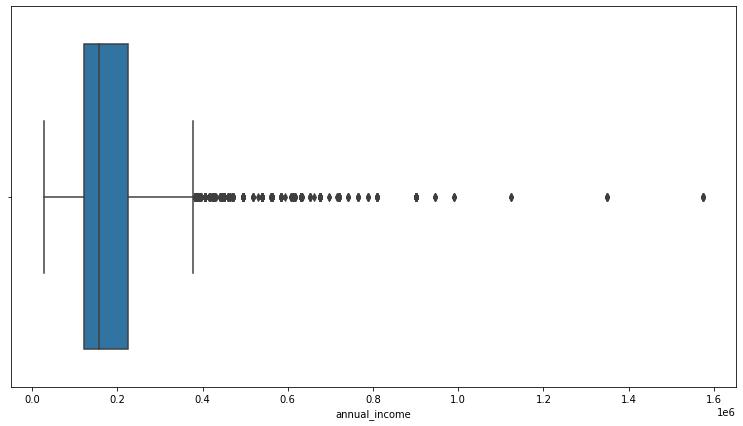

In [16]:
#Detect and remove outliers: Annual_income

plt.figure(figsize=(13,7))
sns.boxplot(df.annual_income)

<AxesSubplot:xlabel='annual_income'>

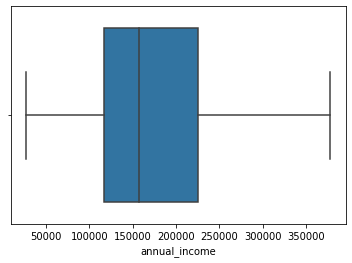

In [17]:
#Option: Z-score or IQR, z-score only for Gaugassian distribution => IQR

def remove_outlier(col):
    q25 = col.quantile(0.25)
    q75 = col.quantile(0.75)
    iqr = q75 - q25
    cutoff = iqr*1.5
    lower = q25 - cutoff
    upper = q75 + cutoff
    return lower, upper

lower, upper = remove_outlier(df.annual_income)

df = df.loc[(df.annual_income > lower) & (df.annual_income < upper)]

sns.boxplot(df.annual_income)

<AxesSubplot:xlabel='fam_members'>

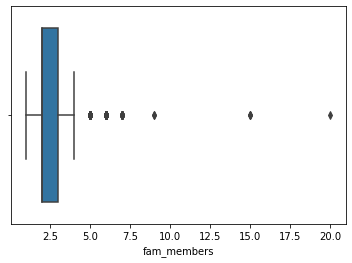

In [18]:

#Detect and remove outliers: Fam_members

sns.boxplot(df.fam_members)

2.0    18729
1.0     6721
3.0     6057
4.0     2976
Name: fam_members, dtype: int64

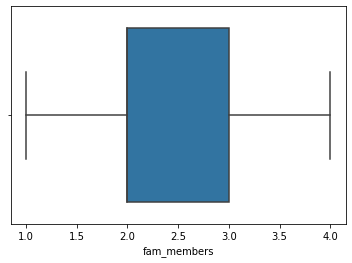

In [19]:
remove_outlier(df.fam_members)

df = df.loc[(df.fam_members>0.5) & (df.fam_members <4.5)]

sns.boxplot(df.fam_members)

df.fam_members.value_counts()

In [20]:
df.head()

,id,gender,car,property,children,annual_income,income_type,education,family_status,housing_type,mobile_phone,work_phone,phone,email,occupation_type,fam_members,months_balance,status,age,year_of_employment
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,1,0,0,0,Security staff,2.0,0,0,59.0,3.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,Sales staff,1.0,0,1,52.0,8.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,Sales staff,1.0,-22,-1,52.0,8.0
5,5008810,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,Sales staff,1.0,0,0,52.0,8.0
6,5008811,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,Sales staff,1.0,0,0,52.0,8.0


In [21]:
#Define target variable
df.status.value_counts()

 0    17052
-1     9079
 1     7997
 2      262
 6       64
 3       18
 4        6
 5        5
Name: status, dtype: int64

<AxesSubplot:xlabel='status'>

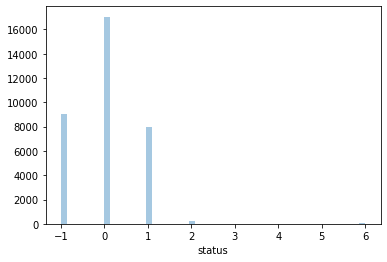

In [22]:
sns.distplot(df.status, kde=False)

In [23]:
#Target = 1 if status >=1 (with due debt), else Target = 0
df['target'] = None
df.loc[df.status < 1,'target']=0
df.loc[df.status >= 1,'target']=1
df.target = pd.to_numeric(df.target)
df.head()

,id,gender,car,property,children,annual_income,income_type,education,family_status,housing_type,...,work_phone,phone,email,occupation_type,fam_members,months_balance,status,age,year_of_employment,target
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,...,0,0,0,Security staff,2.0,0,0,59.0,3.0,0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,0,1,1,Sales staff,1.0,0,1,52.0,8.0,1
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,0,1,1,Sales staff,1.0,-22,-1,52.0,8.0,0
5,5008810,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,0,1,1,Sales staff,1.0,0,0,52.0,8.0,0
6,5008811,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,0,1,1,Sales staff,1.0,0,0,52.0,8.0,0


In [24]:
#Drop unnecessary columns
df.drop(columns=['months_balance', 'status', 'mobile_phone'],inplace=True)

In [25]:
#Convert object dtype to category dtype for feature processing
for i in df.columns:
    if df[i].dtype == 'object':
        df[i] = df[i].astype('category')

df.dtypes

id                       int64
gender                category
car                   category
property              category
children                 int64
annual_income          float64
income_type           category
education             category
family_status         category
housing_type          category
work_phone               int64
phone                    int64
email                    int64
occupation_type       category
fam_members            float64
age                    float64
year_of_employment     float64
target                   int64
dtype: object

In [26]:
#Category encoding
#2.1. Encoding without using the target variable (no independent variables are impacted prior to modeling)
#2.1.1. Binary variable: LabelEncoder, Binarizer
#2.1.2. Nominal variable: using mean or mode // Dummy Coding or OneHotEncoder (<5 values/variable)
#2.1.3. Continous variable: binning with Fixed-width and Adaptive Binning, then apply mean/mode


#2.2. Encoding in relation to the target variable
#2.2.1. WOE Encoder (to pair with IV): apply to the entire dataset
#2.2.2. Compare with Target Encoder/LOO

Data leakage
*Data leakage is when information from outside the training dataset is used to create the model. This additional information can allow the model to learn or know something that it otherwise would not know and in turn invalidate the estimated performance of the mode being constructed.

In [27]:
df_a = df #for 2.1. encoding without target

In [28]:
df_b = df #for 2.2. encoding with target